In [ ]:
#https://ericabae.medium.com/tensorflow-2-0-%ED%95%A9%EC%84%B1%EA%B3%B1-%EC%8B%A0%EA%B2%BD%EB%A7%9D-cnn-bfd925298c9b

In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#try:
#    # %tensorflow_version only exists in Colab.
#    %tensorflow_version 2.x # colab magic command
#except Exception:
#    pass

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__) # 2.5.0

2.5.0


# Data 준비

In [ ]:
# Data : cifar10 
# 클래스 10개의 이름은;'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [68]:
# 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# 픽셀값(RGB값)
# R(Red), G(Green), B(Blue)는 각각 0~255사이의 숫자
# image_width, image_height(가로, 세로 높이)

# 데이터 확인

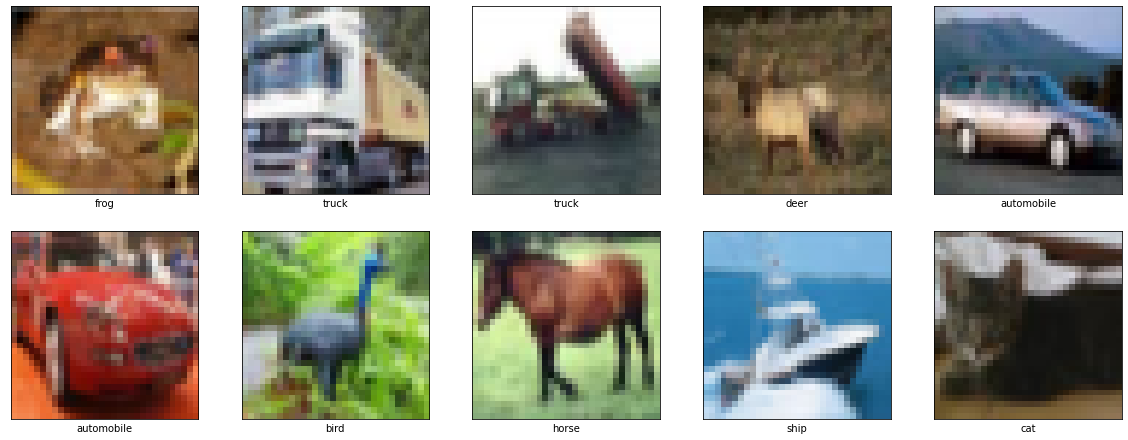

In [69]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20, 20))

for i in range(10):
    plt.subplot(5, 5, i+1)
     
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

(32, 32, 3)
(32, 32)


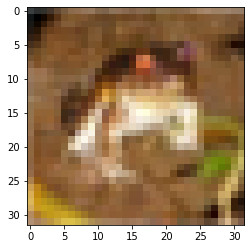

In [70]:
x = train_images[0]
print(x.shape)
print(x[: , :, 0].shape)
plt.imshow(x, cmap=plt.cm.binary)

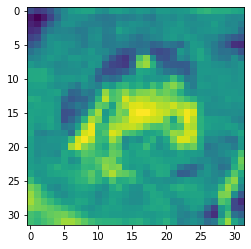

In [54]:
plt.imshow(x[: , :, 0])

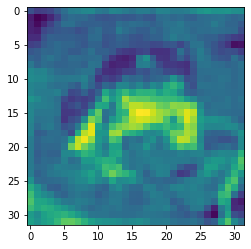

In [47]:
plt.imshow(x[: , :, 1])

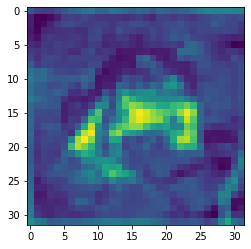

In [48]:
plt.imshow(x[: , :, 2])

In [ ]:
# input_shape=(32,32,3)
# image_height=32
# image_width=32
# color_channels 는 3(RGB)

# Convolutional 기반 만들기

In [15]:
# 한번에? 구성하는 방법
#
#model = tf.keras.Sequential([
#    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#    tf.keras.layers.MaxPooling2D((2,2)),
#    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#    tf.keras.layers.MaxPooling2D((2, 2)),
#    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(64,activation='relu'),
#    tf.keras.layers.Dense(10,activation='softmax')
#])

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# 32 : Filter 수
# (3, 3) : Convolution, Filter shape
# stride = 1?
# padding : (default)no padding(padding='same'을 통해 Zero Padding 가능)
model.add(layers.MaxPooling2D((2, 2)))
# MaxPooling2D : 이미지의 최댓값(픽셀값)을 줄여주는 효과
# (2, 2) : shape(ex : 6x6 -> 2x2)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Convolution 모델 해석

In [63]:
model.summary()

#Model: "sequential_1"
#_________________________________________________________________
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
# 
# Parameter 수 = 896 = (3x3x3 + 1)x32 = (3X3(FilerShape) x 3(R, G, B) + 1(Bias))x32(Filter 수)

#________________________________________________________________
#max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0
#
# MaxPooling 결과 : 2x2의 결과이기 때문의 1/2이 됨
# 32 = Filter 수에서 변화 없음.

#_________________________________________________________________
#conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496 
#
# layers.Conv2D(64, (3, 3)의 결과
# Parameter 수 = 18,496 = (3x3x32 + 1)x64 = (3X3(FilerShape) x 32(직전 Filter수) + 1(Bias))x64(Filter 수)

#_________________________________________________________________
#max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0 
#
# MaxPooling2D(2, 2) 결과

#_________________________________________________________________
#conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928 
# Parameter 수 = 36,928 = (3x3x32 + 1)x64 = (3X3(FilerShape) x 32(직전 Filter수) + 1(Bias))x64(Filter 수)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


# Dense layer 추가

In [73]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Dense Layer 해석

In [76]:
model.summary()

#_________________________________________________________________
#Layer (type)                 Output Shape              Param # 
#_________________________________________________________________
#flatten_1 (Flatten)          (None, 1024)              0         
# layers.Flatten() : 1차원으로 변환
# 진전 output = input shape = (None, 4, 4, 64) = 1024 = 4x4x64

#_________________________________________________________________
#dense_2 (Dense)              (None, 64)                65600     
# Input Node = 1024
# Oupt Node = 64
# Parameter 수 = 65600 = (1024 + 1)x64 = (1024(input node) + 1(bias))x64(output node)

#_________________________________________________________________
#dense_3 (Dense)              (None, 10)                650       
# 10 : 분류 대상 수

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

# 학습

In [77]:
model.compile(optimizer='adam', # adam optimizer...
              loss='sparse_categorical_crossentropy', # 각 샘플이 하나의 class에 속할때 사용하는 loss
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5264 - accuracy: 0.4440 - val_loss: 1.2921 - val_accuracy: 0.5306
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1716 - accuracy: 0.5861 - val_loss: 1.0767 - val_accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0205 - accuracy: 0.6400 - val_loss: 1.0020 - val_accuracy: 0.6470
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9224 - accuracy: 0.6751 - val_loss: 0.9668 - val_accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8502 - accuracy: 0.7008 - val_loss: 0.8911 - val_accuracy: 0.6850
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7927 - accuracy: 0.7222 - val_loss: 0.8779 - val_accuracy: 0.6956
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7426 - accuracy: 0.7402 - val_loss: 0.8684 -

# Test

In [78]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8811 - accuracy: 0.7093
